In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from shapely.geometry import Point
pd.options.display.max_columns = 25


In [2]:
provincias = gpd.read_file('lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias['latitud'] = provincias.centroid.map(lambda p: p.y)
provincias = provincias.to_crs(crs=3395)


In [3]:
estaciones = gpd.read_file('RT_Espana_PorModos.zip!RT_FFCC/rt_estacionffcc_p.shp')
estaciones = estaciones.to_crs("+proj=cea EPSG:4326")
estaciones = estaciones.to_crs(crs=3395)

In [4]:
estaciones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_estfc    3003 non-null   int64   
 1   nombre      3003 non-null   object  
 2   tipo_estfc  3002 non-null   float64 
 3   tipo_estfD  2992 non-null   object  
 4   cod_est     3003 non-null   object  
 5   n_andenes   3003 non-null   int64   
 6   tipo_uso    3003 non-null   int64   
 7   tipo_usoD   3003 non-null   object  
 8   estadofis   3003 non-null   int64   
 9   estadofisD  3003 non-null   object  
 10  fecha_alta  3003 non-null   object  
 11  geometry    3003 non-null   geometry
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 281.7+ KB


In [6]:
def contains_any(nombre:str,lista):
    for ciudad in lista:
        if ciudad in nombre:
            return True
    return False

In [7]:
tramos = gpd.read_file('RT_Espana_PorModos.zip!RT_FFCC/rt_tramofc_linea.shp')
tramos = tramos.to_crs("+proj=cea EPSG:4326")

tramos = tramos.to_crs(crs=3395)
tramos.loc[tramos.nombre.str.contains('036'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0360000'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0440003'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0440002'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[(tramos.codigo.str.contains("12C220010")),"nombre"] = "Ni idea hulio" 
tramos.loc[(tramos.codigo.str.contains("12C220010")),"uso_ppalD"] = "Otros usos" 
lineas_ave = tramos[tramos["uso_ppalD"] == "Uso predominante Alta Velocidad"].dissolve(by="nombre").reset_index()

In [8]:
tramos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50042 entries, 0 to 50041
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_tramo    50042 non-null  float64 
 1   codigo      50042 non-null  object  
 2   tipo_tramo  50042 non-null  int64   
 3   tipotramoD  50042 non-null  object  
 4   ancho_via   50042 non-null  int64   
 5   ancho_viaD  50042 non-null  object  
 6   electrific  50042 non-null  int64   
 7   electrifiD  50042 non-null  object  
 8   estadofis   50042 non-null  int64   
 9   estadofisD  50042 non-null  object  
 10  n_vias      50042 non-null  int64   
 11  n_viasD     50042 non-null  object  
 12  situacion   50042 non-null  int64   
 13  situacionD  50042 non-null  object  
 14  red_tent    50042 non-null  int64   
 15  red_tentD   50042 non-null  object  
 16  uso_ppal    50042 non-null  int64   
 17  uso_ppalD   50042 non-null  object  
 18  titular     50042 non-null  int64   
 

In [9]:
estaciones_excluir="""Estación de Vigo-
Estación de Ourense-Empalme-contenedores
Estación de Córdoba-El Higuerón
Estación de A Coruña-San Diego-contenedores
Estación de León-Clasificación
Estación de Puertollano-Refinería
Plasencia Jalón
Plasencia de Jalón
Plasencia del Monte
Estación de Badajoz-Frontera
Cargadero de Mérida-Contenedores
Apartadero de Casar de Cáceres
Estación de Girona-Mercaderies
Estación de Zaragoza-Delicias
Estación de La Sagrera""".split("\n")
id_redondela_redundante = 360450000149

In [10]:
estaciones_ave_nombres = """Estación de Albacete
Estación de Castelló de la Plana
Estación de Alacant-Terminal
Antequera-Santa Ana
Estación de Madrid-Puerta de Atocha
Barcelona-Sants
Calatayud
Estación de Camp de Tarragona
Clara Campoamor
Estación de Ciudad Real
Estación de Córdoba
Estación de A Coruña
Estación de Cuenca Fernando Zóbel
Elche
Vilafant
Girona
Estación de Granada
Guadalajara-Yebes
Estación de León
Lleida-Pirineus
Loja
Zambrano
Estación de Medina del Campo Alta Velocidad
Murcia del Carmen
Estación de Ourense-Empalme
Orihuela
Palencia
Estación de Pontevedra
Villanueva de Córdoba
Puente Genil-Herrera
Estación de Puertollano
Redondela
Requena -Utiel
Estación de Alta Velocidad de Sanabria
Santiago de Compostela
Estación de Segovia-A.V.
Sevilla-Santa Justa
Estación de Toledo
Sorolla
Valladolid-Campo Grande
Estación de Vigo
Estación de Villena Alta Velocidad
Zamora
Zaragoza-Delicias
Estación de La Sagrera
Badajoz
Mérida
Cáceres
Estación de Plasencia
Estación de Burgos Rosa Manzano""".split("\n")
print(len(estaciones_ave_nombres))

anotaciones_derecha = """Antequera
Vigo
Utiel
Sanabria
Murcia
Elche
Sevilla
Badajoz
Pontevedra
Córdoba
Apartadero""".split("\n")


50


In [11]:
for nombre in estaciones_ave_nombres:
    print(f"{nombre:>50}: {len(estaciones[(estaciones.nombre.str.contains(nombre))&(~estaciones.nombre.apply(lambda x:contains_any(x,estaciones_excluir)))])}")

                              Estación de Albacete: 1
                  Estación de Castelló de la Plana: 1
                      Estación de Alacant-Terminal: 1
                               Antequera-Santa Ana: 1
               Estación de Madrid-Puerta de Atocha: 1
                                   Barcelona-Sants: 1
                                         Calatayud: 1
                     Estación de Camp de Tarragona: 1
                                   Clara Campoamor: 1
                           Estación de Ciudad Real: 1
                               Estación de Córdoba: 1
                              Estación de A Coruña: 1
                 Estación de Cuenca Fernando Zóbel: 1
                                             Elche: 1
                                          Vilafant: 1
                                            Girona: 1
                               Estación de Granada: 1
                                 Guadalajara-Yebes: 1
                            

In [12]:
def sanear_nombre_estacion(nombre:str):
    palabras_redundantes = """Estación de 
Estacion de 
Alta Velocidad de
Alta Velocidad
-Puerta de Atocha
Camp de 
del Carmen
- Joaquin Sorolla
Villanueva de 
Fernanado Zóbel
Miguel Hernández
-Terminal
-Santa Justa
Apartadero de 
-A.V.
E.C.
Fernando Zóbel
-Pirineus
-Campo Grande
-Sants
 Rosa Manzano""".split("\n")
    for word in palabras_redundantes:
        nombre = nombre.replace(word,"")
    
    reemplazos_totales = {"Clara Campoamor":"Zaragoza","María-Zambrano":"Málaga"}
    if nombre in reemplazos_totales:
        nombre = reemplazos_totales[nombre]
    return nombre

Text(0.5, 0.98, 'Líneas y estaciones de Alta Velocidad Española')

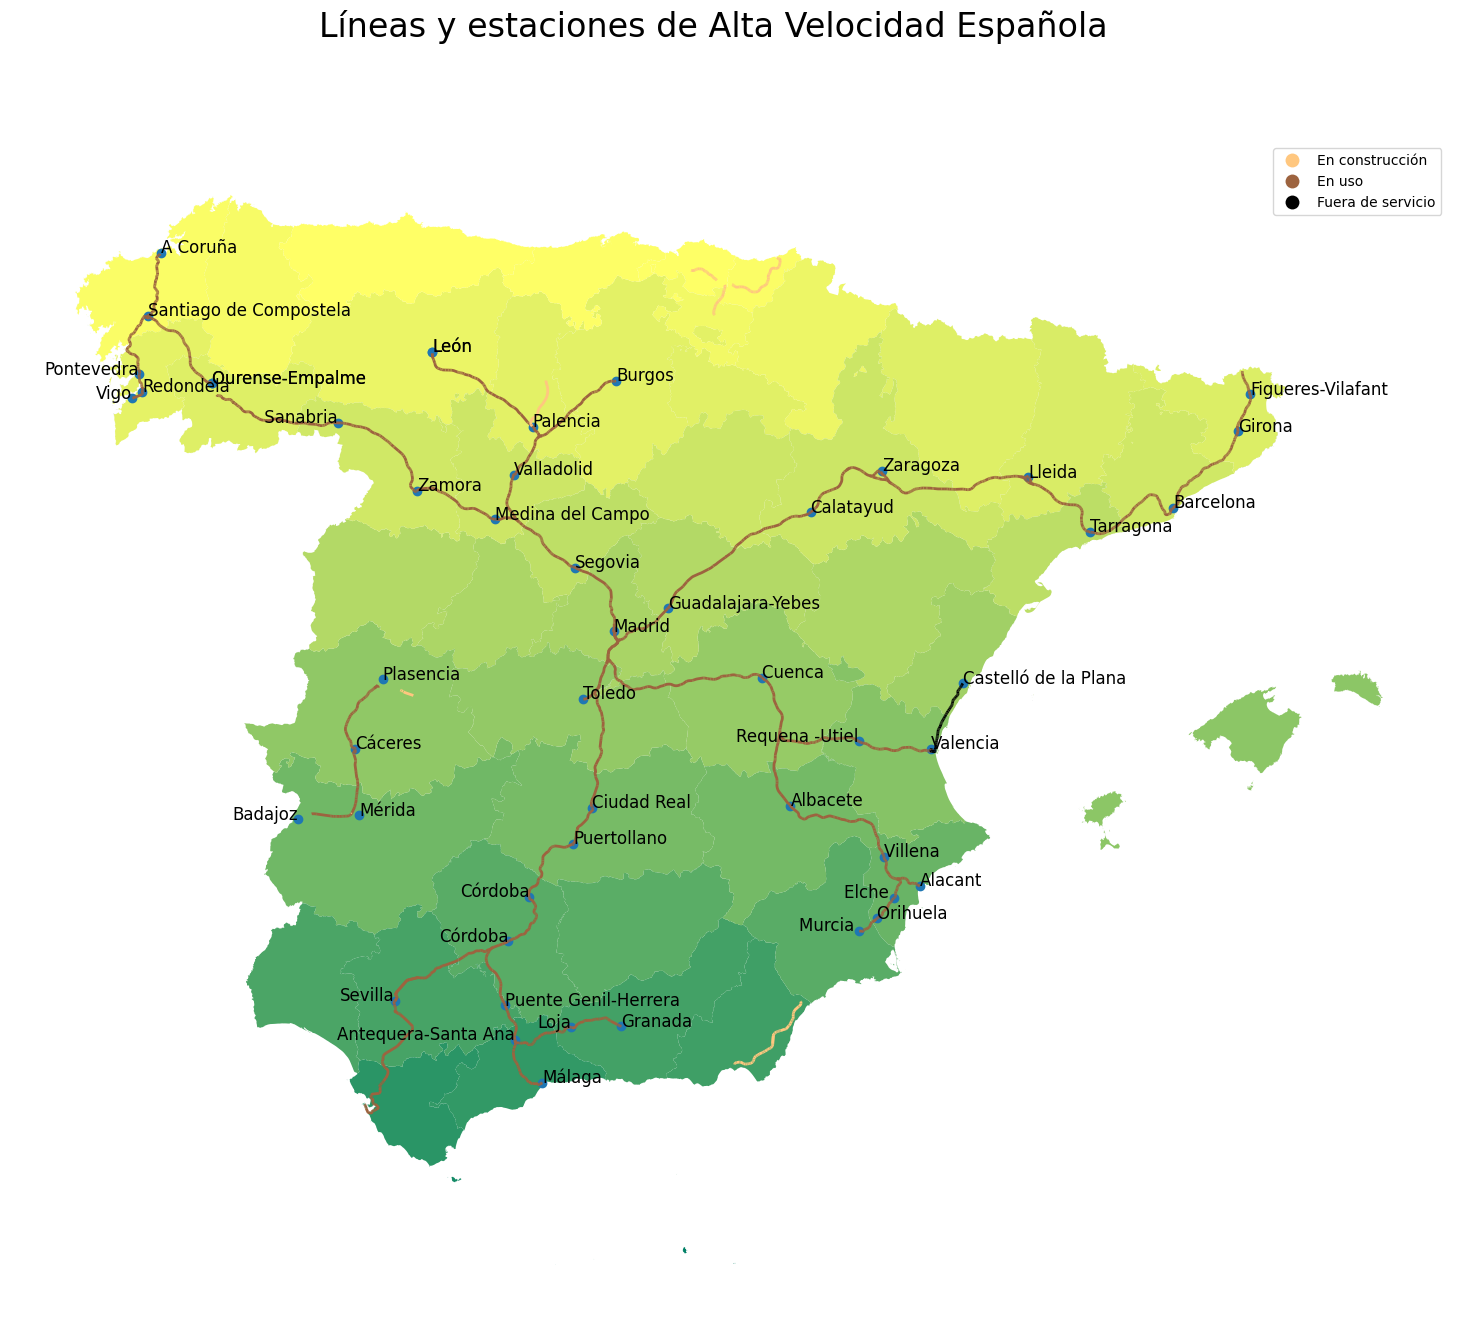

In [13]:
gfd_estaciones_ave = estaciones[(estaciones.id_estfc != id_redondela_redundante)&(estaciones.nombre.apply(lambda x:contains_any(x,estaciones_ave_nombres))& (estaciones.nombre.apply(lambda x:not contains_any(x,estaciones_excluir))))]

fig, (ax1) = plt.subplots(ncols=1,figsize=(15,15))
ax = provincias.plot(ax = ax1, figsize=(15,15),cmap="summer",column="latitud")
lineas_ave.plot(ax = ax,linewidth=2,column="estadofisD",cmap="copper_r",legend=True)
gfd_estaciones_ave.plot(ax = ax)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=sanear_nombre_estacion(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='right',
    fontsize=12),axis=1)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: not contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=sanear_nombre_estacion(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='left',
    fontsize=12),axis=1)
fig.tight_layout()
plt.axis("off")
fig.suptitle("Líneas y estaciones de Alta Velocidad Española",fontsize=24)